In [1]:
import pandas as pd
from gensim.models import Word2Vec
import json
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open(r'C:\Users\Big data\PycharmProjects\collaborative_filtering\dataset\recipe0928_V5.json','r')as f:
    content = json.load(f)

In [3]:
# 將食譜名稱及食材資訊轉成list
df_list = list()
recipe_name_list = list()
for k in content:
    ing_list = list()
    for i in k['ingredient']:
        ing_list.append(i[0])
        
    recipe_name_list.append(k['recipe'])
    df_list.append(ing_list)

In [25]:
df_list[:10]

[['雞蛋', '太白粉'],
 ['草莓', '牛奶巧克力', '巧克力', '煉乳'],
 ['麵粉', '發粉', '鮮奶油', '柳橙', '藍苺'],
 ['羊肉', '迷迭香'],
 ['麵粉', '牛奶', '酵母', '百里香', '香腸'],
 ['紅豆', '紫米', '湯圓'],
 ['丸子', '香菇', '紅蘿蔔', '豌豆', '蔥', '筍'],
 ['草莓', '煉乳'],
 ['三層肉', '蔥'],
 ['南瓜', '雞腿', '玉米', '飯', '洋蔥']]

In [26]:
recipe_name_list[:10]

['金黃玉子燒',
 '草莓棒棒糖',
 '橙皮藍莓小鬆餅',
 '法式第戎羊小排',
 '米奇香草胡椒熱狗麵包',
 '紅豆紫米湯圓',
 '蔥燒什蔬肉丸子',
 '草莓酌煉乳',
 '壽喜控肉穀盛壽喜燒',
 '鮮蔬南瓜嫩雞燉飯']

## 只用食材的embedding模型

In [28]:
start = time.time()
#Train the Word2Vec model

num_features = 100  
# Word vector dimensionality - The size of the dense vector to represent each token or word 
#(i.e. the context or neighboring words). If you have limited data, then size should be a much smaller value 
#since you would only have so many unique neighbors for a given word

min_word_count = 1                        
# Minimium frequency count of words. The model would ignore words that do not satisfy the min_count.

num_workers = 8       # How many threads to use behind the scenes?

context = 10          
# The maximum distance between the target word and its neighboring word.  

downsampling = 1e-2   
# threshold for configuring which higher-frequency words are randomly downsampled
            
# Initialize and train the model 
model = Word2Vec(df_list, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context,sample = downsampling, iter=100,sg=1)

model.save("w2v_ingredient_only.model")
# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
# model.init_sims(replace=True)

end = time.time()

print(f'Training completed. It cost : {round(end-start,2)} sec')

Training completed. It cost : 83.62 sec


#### https://medium.com/ai-academy-taiwan/nlp-%E4%B8%8D%E5%90%8C%E8%A9%9E%E5%90%91%E9%87%8F%E5%9C%A8%E6%96%87%E6%9C%AC%E5%88%86%E9%A1%9E%E4%B8%8A%E7%9A%84%E8%A1%A8%E7%8F%BE%E8%88%87%E5%AF%A6%E4%BD%9C-e72a2daecfc
### https://github.com/TomLin/MeetUp

In [5]:
# 套用別人的code，完成詞向量加總平均得到文本向量
from UtilWordEmbedding import MeanEmbeddingVectorizer

In [6]:
mean_vec_tr = MeanEmbeddingVectorizer(model)

In [7]:
# transform計算文本向量
doc_vec = mean_vec_tr.transform(df_list)

In [8]:
print('Shape of word-mean doc2vec...')
display(doc_vec.shape)

Shape of word-mean doc2vec...


(179763, 100)

In [17]:
type(doc_vec)

numpy.ndarray

In [58]:
print('Save word-mean doc2vec as csv file...')
np.savetxt('doc_vec.csv', doc_vec, delimiter=',')

Save word-mean doc2vec as csv file...


In [59]:
# 算一下有多少zero array
count = [0,0]
for arr in doc_vec:
    if np.all(arr == 0):
        count[0] += 1
    else:
        count[1] += 1
print(count)

[351, 179412]


In [41]:
doc_vec[5]

array([ 0.18466131,  0.26268291,  0.15795092, -0.31374133, -0.56667989,
        0.05191555,  0.21278758,  0.66067773, -0.51480609, -0.03986974,
       -0.10016888,  0.51010555,  0.55440921, -0.12410424,  0.27470103,
        0.60209721, -0.47324142, -0.76724815,  0.47034755, -0.30113497,
        0.02093428,  1.2658335 ,  0.01128122, -0.38314071, -0.02761564,
        0.51191568,  0.09666232,  0.47278976, -0.29192311,  0.51702613,
       -0.40263703, -0.2227612 ,  0.37321159,  0.20156087, -0.46435046,
       -0.08093994,  0.34365597, -0.24798143,  0.17780428,  0.20370789,
       -0.29224786, -0.37009287,  0.68281436, -0.20195866,  0.97821426,
        0.06360749,  0.21595722,  0.66500574,  0.05214955, -0.36382198])

In [28]:
df_list[5]

['紅豆', '紫米', '湯圓']

In [35]:
avg = []
for ing in df_list[5]:
    v = model.wv.get_vector(ing)
    avg.append(v)

In [37]:
(avg[0] + avg[1] + avg[2]) / 3

array([ 0.18466131,  0.2626829 ,  0.15795092, -0.31374133, -0.5666799 ,
        0.05191555,  0.21278758,  0.66067773, -0.5148061 , -0.03986974,
       -0.10016888,  0.51010555,  0.5544092 , -0.12410424,  0.27470103,
        0.6020972 , -0.47324142, -0.76724815,  0.47034755, -0.30113497,
        0.02093428,  1.2658335 ,  0.01128122, -0.3831407 , -0.02761564,
        0.5119157 ,  0.09666232,  0.47278976, -0.2919231 ,  0.5170261 ,
       -0.40263703, -0.2227612 ,  0.3732116 ,  0.20156087, -0.46435046,
       -0.08093994,  0.34365597, -0.24798143,  0.17780428,  0.20370789,
       -0.29224786, -0.37009287,  0.68281436, -0.20195866,  0.97821426,
        0.06360749,  0.21595722,  0.66500574,  0.05214955, -0.36382198],
      dtype=float32)

In [44]:
doc_vec

array([[-0.0270873 ,  0.0994598 ,  0.18628675, ...,  0.13922042,
        -0.29117838, -0.1098223 ],
       [-0.14596412,  0.64730847, -0.25166333, ...,  0.44505906,
        -0.08370022, -0.46907824],
       [ 0.10474825,  0.06668226, -0.08739807, ..., -0.00269548,
        -0.26534018, -0.15141074],
       ...,
       [-0.39853001, -0.04688052,  0.2370569 , ...,  0.15018409,
        -0.33678842,  0.30205759],
       [-0.38982207,  0.31793314,  0.09185835, ...,  0.2007964 ,
        -0.22886474,  0.11245561],
       [-0.05798297,  0.05757949,  0.2825987 , ...,  0.29476604,
        -0.24158621,  0.29180884]])

## 加入調味料一同計算

In [10]:
df_list_both = list()
for k in content:
    ing_list = list()
    for i in k['ingredient']:
        ing_list.append(i[0])
    for j in k['seasoning']:
        ing_list.append(j[0])
    df_list_both.append(ing_list)

In [11]:
df_list_both[:10]

[['雞蛋', '太白粉', '水', '味醂', '鰹魚粉'],
 ['草莓', '牛奶巧克力', '巧克力', '煉乳'],
 ['麵粉', '發粉', '鮮奶油', '柳橙', '藍苺', '砂糖', '奶油'],
 ['羊肉', '迷迭香', '植物油', '法式芥末醬'],
 ['麵粉', '牛奶', '酵母', '百里香', '香腸', '鹽', '砂糖', '奶油', '胡椒'],
 ['紅豆', '紫米', '湯圓', '砂糖'],
 ['丸子', '香菇', '紅蘿蔔', '豌豆', '蔥', '筍', '蠔油', '砂糖'],
 ['草莓', '煉乳'],
 ['三層肉', '蔥', '壽喜燒醬', '水', '料理酒'],
 ['南瓜', '雞腿', '玉米', '飯', '洋蔥', '植物油', '胡椒粉', '料理酒']]

### 有加調味料的模型

In [12]:
start = time.time()
#Train the Word2Vec model

num_features = 100  #設定特徵向量維度
min_word_count = 1                        
num_workers = 8 
context = 10          
downsampling = 1e-2   

model_both = Word2Vec(df_list_both, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context,sample = downsampling, iter=100,sg=1)


end = time.time()

print(f'Training completed. It cost : {round(end-start,2)} sec')

Training completed. It cost : 157.24 sec


In [13]:
from UtilWordEmbedding import MeanEmbeddingVectorizer
mean_vec_tr_both = MeanEmbeddingVectorizer(model_both)
doc_vec_both = mean_vec_tr_both.transform(df_list_both)

In [14]:
doc_vec_both.shape

(179763, 100)

In [15]:
np.savetxt('doc_vec_both.csv', doc_vec_both, delimiter=',')

In [16]:
# 算一下有多少zero array
count = [0,0]
for arr in doc_vec_both:
    if np.all(arr == 0):
        count[0] += 1
    else:
        count[1] += 1
print(count)

[0, 179763]


In [17]:
doc_vec_both[5]

array([ 0.03916569, -0.09800835, -0.00945626,  0.22982328,  0.25762615,
       -0.24383008,  0.07708216, -0.6064955 ,  0.22472055, -0.17691933,
       -0.2693111 , -0.3146835 , -0.17549434, -0.09555204, -0.04613725,
       -0.36374596,  0.3853637 ,  0.611907  , -0.37398425,  0.413852  ,
       -0.13565475,  0.39384797,  0.08331351, -0.30425903, -0.14831604,
        0.34086123,  0.12692522, -0.11132921, -0.2899684 ,  0.45678708,
       -0.40762916, -0.47532475, -0.24318272,  0.46058097, -0.03677201,
       -0.03938381,  0.6013909 ,  0.03807186, -0.07868375, -0.4439171 ,
        0.06203571,  0.31308502,  0.064578  ,  0.16704507,  0.10103354,
        0.2407357 ,  0.11136198,  0.2630635 , -0.2565024 , -0.08285952,
       -0.30415443, -0.0589544 , -0.11350945,  0.2698776 , -0.00081502,
       -0.05839947, -0.23116776, -0.2121288 , -0.6727029 , -0.04306511,
        0.2492939 ,  0.06933672,  0.40522614,  0.04554188,  0.06037847,
        0.30719775,  0.22640978, -0.37589103, -0.00571047,  0.09

### KMeans 從這開始

In [18]:
from sklearn.cluster import KMeans
from sklearn import datasets, metrics

In [19]:
start = time.time()

clf = KMeans(n_clusters=3)
clf.fit(doc_vec_both)

end = time.time()
print(f'Training completed. It cost : {round(end-start,2)} sec')

Training completed. It cost : 4.6 sec


In [20]:
clf.labels_

array([0, 2, 2, ..., 0, 0, 0])

#### K-means 怎麼選 K ? https://blog.v123582.tw/2019/01/20/K-means-%E6%80%8E%E9%BA%BC%E9%81%B8-K/

In [21]:
# 找出最適cluster群數
start = time.time()

silhouette_avgs = []
_inertia = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = KMeans(n_clusters = k,verbose=1).fit(doc_vec_both)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(doc_vec_both, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    _inertia.append(kmeans_fit.inertia_)

    
end = time.time()
print(f'Training completed. It cost : {round(end-start,2)} sec')

Initialization complete
Iteration 0, inertia 349999.125
Iteration 1, inertia 227855.734375
Iteration 2, inertia 227528.125
Iteration 3, inertia 227485.671875
Iteration 4, inertia 227478.4375
Iteration 5, inertia 227476.75
Iteration 6, inertia 227476.375
Converged at iteration 6: center shift 6.598065169782785e-07 within tolerance 1.550742518156767e-06.
Initialization complete
Iteration 0, inertia 401441.84375
Iteration 1, inertia 269833.90625
Iteration 2, inertia 268930.5625
Iteration 3, inertia 267827.65625
Iteration 4, inertia 261087.046875
Iteration 5, inertia 236914.359375
Iteration 6, inertia 228159.65625
Iteration 7, inertia 227558.953125
Iteration 8, inertia 227486.578125
Iteration 9, inertia 227480.046875
Iteration 10, inertia 227477.328125
Iteration 11, inertia 227476.484375
Converged at iteration 11: center shift 8.365355483874737e-07 within tolerance 1.550742518156767e-06.
Initialization complete
Iteration 0, inertia 342681.21875
Iteration 1, inertia 228269.265625
Iteration 

Iteration 24, inertia 218647.78125
Iteration 25, inertia 218647.9375
Iteration 26, inertia 218647.6875
Iteration 27, inertia 218647.65625
Iteration 28, inertia 218646.546875
Converged at iteration 28: center shift 1.262210162167321e-06 within tolerance 1.550742518156767e-06.
Initialization complete
Iteration 0, inertia 290684.96875
Iteration 1, inertia 213961.96875
Iteration 2, inertia 212742.96875
Iteration 3, inertia 212656.875
Iteration 4, inertia 212647.203125
Iteration 5, inertia 212647.421875
Iteration 6, inertia 212646.1875
Converged at iteration 6: center shift 8.74828117503057e-07 within tolerance 1.550742518156767e-06.
Initialization complete
Iteration 0, inertia 305321.375
Iteration 1, inertia 217932.390625
Iteration 2, inertia 213241.34375
Iteration 3, inertia 212730.25
Iteration 4, inertia 212666.640625
Iteration 5, inertia 212654.625
Iteration 6, inertia 212650.78125
Iteration 7, inertia 212647.796875
Iteration 8, inertia 212647.640625
Iteration 9, inertia 212647.71875
It

Iteration 17, inertia 206869.0625
Iteration 18, inertia 206867.65625
Iteration 19, inertia 206864.9375
Iteration 20, inertia 206862.28125
Iteration 21, inertia 206859.796875
Iteration 22, inertia 206858.046875
Iteration 23, inertia 206857.390625
Iteration 24, inertia 206855.609375
Iteration 25, inertia 206854.46875
Iteration 26, inertia 206855.125
Iteration 27, inertia 206852.953125
Iteration 28, inertia 206853.203125
Iteration 29, inertia 206851.140625
Iteration 30, inertia 206851.328125
Iteration 31, inertia 206851.46875
Iteration 32, inertia 206849.578125
Iteration 33, inertia 206848.765625
Iteration 34, inertia 206847.171875
Iteration 35, inertia 206847.84375
Iteration 36, inertia 206847.0
Iteration 37, inertia 206846.015625
Iteration 38, inertia 206845.6875
Iteration 39, inertia 206845.078125
Iteration 40, inertia 206843.15625
Iteration 41, inertia 206841.296875
Iteration 42, inertia 206840.484375
Iteration 43, inertia 206840.609375
Iteration 44, inertia 206839.25
Iteration 45, in

Iteration 3, inertia 213660.96875
Iteration 4, inertia 210586.5
Iteration 5, inertia 206557.75
Iteration 6, inertia 205042.34375
Iteration 7, inertia 204763.46875
Iteration 8, inertia 204709.46875
Iteration 9, inertia 204694.78125
Iteration 10, inertia 204692.0
Iteration 11, inertia 204691.765625
Iteration 12, inertia 204692.46875
Iteration 13, inertia 204690.96875
Iteration 14, inertia 204691.265625
Iteration 15, inertia 204690.09375
Converged at iteration 15: center shift 9.355979386782565e-07 within tolerance 1.550742518156767e-06.
Initialization complete
Iteration 0, inertia 300650.09375
Iteration 1, inertia 208190.59375
Iteration 2, inertia 205787.078125
Iteration 3, inertia 205167.59375
Iteration 4, inertia 204906.96875
Iteration 5, inertia 204798.34375
Iteration 6, inertia 204750.078125
Iteration 7, inertia 204730.984375
Iteration 8, inertia 204722.75
Iteration 9, inertia 204715.015625
Iteration 10, inertia 204711.046875
Iteration 11, inertia 204705.625
Iteration 12, inertia 204

Iteration 7, inertia 203946.1875
Iteration 8, inertia 203400.6875
Iteration 9, inertia 202538.015625
Iteration 10, inertia 201595.578125
Iteration 11, inertia 201107.34375
Iteration 12, inertia 200933.203125
Iteration 13, inertia 200864.828125
Iteration 14, inertia 200827.765625
Iteration 15, inertia 200793.28125
Iteration 16, inertia 200768.03125
Iteration 17, inertia 200740.734375
Iteration 18, inertia 200714.265625
Iteration 19, inertia 200681.484375
Iteration 20, inertia 200647.703125
Iteration 21, inertia 200621.625
Iteration 22, inertia 200597.0625
Iteration 23, inertia 200573.921875
Iteration 24, inertia 200549.578125
Iteration 25, inertia 200528.46875
Iteration 26, inertia 200513.53125
Iteration 27, inertia 200501.921875
Iteration 28, inertia 200491.0
Iteration 29, inertia 200480.296875
Iteration 30, inertia 200470.671875
Iteration 31, inertia 200464.390625
Iteration 32, inertia 200459.359375
Iteration 33, inertia 200458.890625
Iteration 34, inertia 200456.046875
Iteration 35, 

Iteration 59, inertia 200955.75
Iteration 60, inertia 200948.40625
Iteration 61, inertia 200933.421875
Iteration 62, inertia 200924.953125
Iteration 63, inertia 200907.890625
Iteration 64, inertia 200889.671875
Iteration 65, inertia 200871.359375
Iteration 66, inertia 200853.203125
Iteration 67, inertia 200833.484375
Iteration 68, inertia 200811.9375
Iteration 69, inertia 200788.875
Iteration 70, inertia 200760.953125
Iteration 71, inertia 200736.296875
Iteration 72, inertia 200712.15625
Iteration 73, inertia 200680.0625
Iteration 74, inertia 200650.28125
Iteration 75, inertia 200622.828125
Iteration 76, inertia 200596.765625
Iteration 77, inertia 200573.75
Iteration 78, inertia 200549.65625
Iteration 79, inertia 200530.640625
Iteration 80, inertia 200516.03125
Iteration 81, inertia 200503.25
Iteration 82, inertia 200491.46875
Iteration 83, inertia 200481.546875
Iteration 84, inertia 200472.109375
Iteration 85, inertia 200464.84375
Iteration 86, inertia 200461.625
Iteration 87, inertia

Iteration 36, inertia 194829.4375
Iteration 37, inertia 194828.46875
Iteration 38, inertia 194828.390625
Converged at iteration 38: center shift 8.842872603054275e-07 within tolerance 1.550742518156767e-06.
Initialization complete
Iteration 0, inertia 256412.6875
Iteration 1, inertia 204073.453125
Iteration 2, inertia 201464.203125
Iteration 3, inertia 200491.984375
Iteration 4, inertia 199832.890625
Iteration 5, inertia 199357.0625
Iteration 6, inertia 198984.296875
Iteration 7, inertia 198660.671875
Iteration 8, inertia 198387.59375
Iteration 9, inertia 198138.8125
Iteration 10, inertia 197934.40625
Iteration 11, inertia 197787.34375
Iteration 12, inertia 197680.40625
Iteration 13, inertia 197594.46875
Iteration 14, inertia 197516.234375
Iteration 15, inertia 197458.234375
Iteration 16, inertia 197409.9375
Iteration 17, inertia 197370.25
Iteration 18, inertia 197338.109375
Iteration 19, inertia 197310.4375
Iteration 20, inertia 197287.328125
Iteration 21, inertia 197267.515625
Iterat

Iteration 3, inertia 193331.84375
Iteration 4, inertia 192499.53125
Iteration 5, inertia 191955.765625
Iteration 6, inertia 191564.375
Iteration 7, inertia 191238.96875
Iteration 8, inertia 191031.5
Iteration 9, inertia 190919.859375
Iteration 10, inertia 190865.90625
Iteration 11, inertia 190830.96875
Iteration 12, inertia 190801.140625
Iteration 13, inertia 190765.984375
Iteration 14, inertia 190733.546875
Iteration 15, inertia 190696.96875
Iteration 16, inertia 190662.875
Iteration 17, inertia 190637.25
Iteration 18, inertia 190608.609375
Iteration 19, inertia 190595.03125
Iteration 20, inertia 190585.875
Iteration 21, inertia 190582.078125
Iteration 22, inertia 190577.6875
Iteration 23, inertia 190575.84375
Iteration 24, inertia 190572.859375
Iteration 25, inertia 190570.671875
Iteration 26, inertia 190569.34375
Iteration 27, inertia 190567.046875
Iteration 28, inertia 190565.265625
Iteration 29, inertia 190566.484375
Iteration 30, inertia 190565.9375
Iteration 31, inertia 190566.8

Iteration 19, inertia 191686.90625
Iteration 20, inertia 191683.5625
Iteration 21, inertia 191680.28125
Iteration 22, inertia 191678.375
Iteration 23, inertia 191676.5
Iteration 24, inertia 191675.609375
Iteration 25, inertia 191674.671875
Iteration 26, inertia 191674.25
Iteration 27, inertia 191674.109375
Iteration 28, inertia 191673.3125
Iteration 29, inertia 191673.953125
Iteration 30, inertia 191674.265625
Iteration 31, inertia 191674.4375
Iteration 32, inertia 191675.71875
Converged at iteration 32: center shift 7.649849180779711e-07 within tolerance 1.550742518156767e-06.
Initialization complete
Iteration 0, inertia 288444.5
Iteration 1, inertia 205540.546875
Iteration 2, inertia 201043.640625
Iteration 3, inertia 199122.8125
Iteration 4, inertia 197559.765625
Iteration 5, inertia 196035.421875
Iteration 6, inertia 194561.390625
Iteration 7, inertia 193265.890625
Iteration 8, inertia 192456.28125
Iteration 9, inertia 192118.109375
Iteration 10, inertia 191976.140625
Iteration 11,

Iteration 58, inertia 187822.578125
Iteration 59, inertia 187812.28125
Iteration 60, inertia 187801.1875
Iteration 61, inertia 187783.96875
Iteration 62, inertia 187768.171875
Iteration 63, inertia 187749.703125
Iteration 64, inertia 187727.90625
Iteration 65, inertia 187702.484375
Iteration 66, inertia 187677.984375
Iteration 67, inertia 187648.765625
Iteration 68, inertia 187620.21875
Iteration 69, inertia 187595.015625
Iteration 70, inertia 187570.28125
Iteration 71, inertia 187551.859375
Iteration 72, inertia 187534.609375
Iteration 73, inertia 187521.21875
Iteration 74, inertia 187510.53125
Iteration 75, inertia 187501.0625
Iteration 76, inertia 187494.015625
Iteration 77, inertia 187490.625
Iteration 78, inertia 187487.515625
Iteration 79, inertia 187478.953125
Iteration 80, inertia 187475.640625
Iteration 81, inertia 187474.96875
Iteration 82, inertia 187473.421875
Iteration 83, inertia 187472.9375
Iteration 84, inertia 187473.015625
Iteration 85, inertia 187472.5
Iteration 86, 

Iteration 11, inertia 184814.484375
Iteration 12, inertia 184717.90625
Iteration 13, inertia 184648.0
Iteration 14, inertia 184604.78125
Iteration 15, inertia 184580.3125
Iteration 16, inertia 184560.859375
Iteration 17, inertia 184552.171875
Iteration 18, inertia 184546.59375
Iteration 19, inertia 184545.375
Iteration 20, inertia 184545.359375
Iteration 21, inertia 184542.578125
Iteration 22, inertia 184542.46875
Iteration 23, inertia 184543.4375
Iteration 24, inertia 184543.359375
Iteration 25, inertia 184543.921875
Iteration 26, inertia 184543.625
Iteration 27, inertia 184543.6875
Converged at iteration 27: center shift 1.3616270280181197e-06 within tolerance 1.550742518156767e-06.
Initialization complete
Iteration 0, inertia 267149.8125
Iteration 1, inertia 193837.578125
Iteration 2, inertia 190536.546875
Iteration 3, inertia 189052.40625
Iteration 4, inertia 188123.8125
Iteration 5, inertia 187703.296875
Iteration 6, inertia 187496.421875
Iteration 7, inertia 187326.09375
Iteratio

Iteration 56, inertia 185708.46875
Iteration 57, inertia 185708.0625
Iteration 58, inertia 185708.0625
Converged at iteration 58: center shift 1.2499452850533999e-06 within tolerance 1.550742518156767e-06.
Initialization complete
Iteration 0, inertia 254401.5
Iteration 1, inertia 196845.375
Iteration 2, inertia 190844.578125
Iteration 3, inertia 188278.84375
Iteration 4, inertia 187020.765625
Iteration 5, inertia 185984.953125
Iteration 6, inertia 185227.4375
Iteration 7, inertia 184848.53125
Iteration 8, inertia 184699.890625
Iteration 9, inertia 184633.3125
Iteration 10, inertia 184600.859375
Iteration 11, inertia 184582.890625
Iteration 12, inertia 184576.140625
Iteration 13, inertia 184566.34375
Iteration 14, inertia 184563.484375
Iteration 15, inertia 184558.75
Iteration 16, inertia 184555.203125
Iteration 17, inertia 184550.234375
Iteration 18, inertia 184544.671875
Iteration 19, inertia 184543.859375
Iteration 20, inertia 184543.546875
Iteration 21, inertia 184544.40625
Iteratio

Iteration 26, inertia 182153.46875
Iteration 27, inertia 182154.203125
Iteration 28, inertia 182153.75
Iteration 29, inertia 182153.78125
Iteration 30, inertia 182153.53125
Converged at iteration 30: center shift 1.0881437901844038e-06 within tolerance 1.550742518156767e-06.
Initialization complete
Iteration 0, inertia 256005.84375
Iteration 1, inertia 196090.90625
Iteration 2, inertia 191363.203125
Iteration 3, inertia 188439.65625
Iteration 4, inertia 186706.09375
Iteration 5, inertia 185755.40625
Iteration 6, inertia 185145.015625
Iteration 7, inertia 184682.75
Iteration 8, inertia 184316.515625
Iteration 9, inertia 184027.453125
Iteration 10, inertia 183792.078125
Iteration 11, inertia 183599.890625
Iteration 12, inertia 183440.421875
Iteration 13, inertia 183266.953125
Iteration 14, inertia 183110.875
Iteration 15, inertia 182954.984375
Iteration 16, inertia 182816.375
Iteration 17, inertia 182690.171875
Iteration 18, inertia 182578.359375
Iteration 19, inertia 182493.34375
Iterat

Iteration 21, inertia 182153.546875
Iteration 22, inertia 182153.890625
Iteration 23, inertia 182152.515625
Iteration 24, inertia 182152.796875
Iteration 25, inertia 182153.90625
Iteration 26, inertia 182153.96875
Iteration 27, inertia 182153.328125
Iteration 28, inertia 182153.4375
Converged at iteration 28: center shift 1.5447976693394594e-06 within tolerance 1.550742518156767e-06.
Initialization complete
Iteration 0, inertia 262652.71875
Iteration 1, inertia 194837.015625
Iteration 2, inertia 191368.25
Iteration 3, inertia 189850.765625
Iteration 4, inertia 188870.828125
Iteration 5, inertia 188046.109375
Iteration 6, inertia 187033.8125
Iteration 7, inertia 185988.421875
Iteration 8, inertia 185194.078125
Iteration 9, inertia 184573.625
Iteration 10, inertia 184162.203125
Iteration 11, inertia 183956.296875
Iteration 12, inertia 183851.671875
Iteration 13, inertia 183793.5625
Iteration 14, inertia 183758.84375
Iteration 15, inertia 183734.296875
Iteration 16, inertia 183712.65625
I

Iteration 93, inertia 183443.046875
Iteration 94, inertia 183436.359375
Iteration 95, inertia 183432.34375
Iteration 96, inertia 183426.34375
Iteration 97, inertia 183421.96875
Iteration 98, inertia 183418.46875
Iteration 99, inertia 183416.8125
Iteration 100, inertia 183416.5625
Iteration 101, inertia 183415.765625
Iteration 102, inertia 183414.65625
Iteration 103, inertia 183412.609375
Iteration 104, inertia 183411.03125
Iteration 105, inertia 183411.8125
Iteration 106, inertia 183411.234375
Iteration 107, inertia 183409.890625
Iteration 108, inertia 183410.21875
Iteration 109, inertia 183409.703125
Iteration 110, inertia 183410.46875
Iteration 111, inertia 183410.265625
Iteration 112, inertia 183410.796875
Converged at iteration 112: center shift 8.452489055343904e-07 within tolerance 1.550742518156767e-06.
Initialization complete
Iteration 0, inertia 260923.453125
Iteration 1, inertia 195193.65625
Iteration 2, inertia 193185.3125
Iteration 3, inertia 192144.890625
Iteration 4, iner

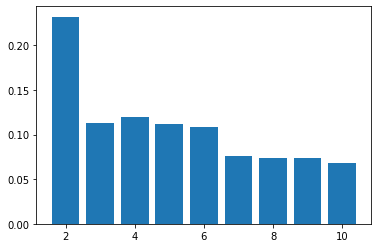

[0.23199861, 0.11265668, 0.119253434, 0.11141539, 0.108579054, 0.075891115, 0.07398187, 0.074269645, 0.068068355]


In [22]:
# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

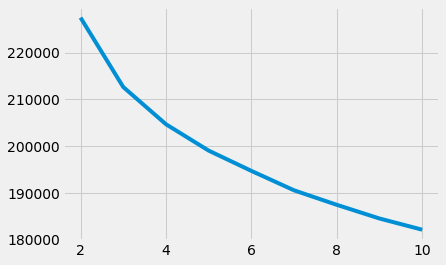

[227474.75, 212646.015625, 204689.65625, 199055.734375, 194719.5625, 190564.84375, 187469.046875, 184543.09375, 182153.296875]


In [23]:
# 作圖並印出 k = 2 到 10 的SSE
plt.style.use("fivethirtyeight")
plt.plot(ks, _inertia)
plt.show()
print(_inertia)

In [11]:
start = time.time()

clf = KMeans(n_clusters=4)
clf.fit(doc_vec_both)

end = time.time()
print(f'Training completed. It cost : {round(end-start,2)} sec')

Training completed. It cost : 7.28 sec


In [12]:
kmeans_clustering_labels = pd.DataFrame(clf.labels_, columns=['cluster'])

In [13]:
kmeans_clustering_labels

,cluster
0,3
1,2
2,2
3,3
4,2
...,...
179758,2
179759,3
179760,0
179761,0


In [14]:
recipe_name = pd.Series(recipe_name_list)

In [15]:
recipe_name

0                金黃玉子燒
1                草莓棒棒糖
2              橙皮藍莓小鬆餅
3              法式第戎羊小排
4           米奇香草胡椒熱狗麵包
              ...     
179758           花捲初體驗
179759           焗烤綠竹筍
179760           麻竹筍炊飯
179761            香煎餛飩
179762    偽古早味新鮮鳳梨燒虱目魚
Length: 179763, dtype: object

In [16]:
recipe_cluster = pd.concat([recipe_name, kmeans_clustering_labels], axis=1)

In [17]:
recipe_cluster

,0,cluster
0,金黃玉子燒,3
1,草莓棒棒糖,2
2,橙皮藍莓小鬆餅,2
3,法式第戎羊小排,3
4,米奇香草胡椒熱狗麵包,2
...,...,...
179758,花捲初體驗,2
179759,焗烤綠竹筍,3
179760,麻竹筍炊飯,0
179761,香煎餛飩,0


In [18]:
recipe_cluster.iloc[0,1]

3

In [19]:
cluster_dic = dict()  
for each in range(len(recipe_cluster[0])):
    cluster_dic[recipe_cluster.iloc[each,0]] = recipe_cluster.iloc[each,1]
cluster_dic

{'金黃玉子燒': 3,
 '草莓棒棒糖': 2,
 '橙皮藍莓小鬆餅': 2,
 '法式第戎羊小排': 3,
 '米奇香草胡椒熱狗麵包': 2,
 '紅豆紫米湯圓': 1,
 '蔥燒什蔬肉丸子': 0,
 '草莓酌煉乳': 2,
 '壽喜控肉穀盛壽喜燒': 0,
 '鮮蔬南瓜嫩雞燉飯': 3,
 '白玉小米粥': 1,
 '草莓盆栽提拉米蘇咖啡口味無鮮奶油': 2,
 '條瓜蘿蔔雞湯': 0,
 '光波爐車厘茄': 3,
 '鹹豬肉炒黃豆芽': 0,
 '鳳凰蝦卷': 3,
 '大蒜羊肉': 0,
 '帶子芋盒': 3,
 '抹茶奶酪': 2,
 '合桃紅梅包': 2,
 '鹽漬檸檬烤白鯧': 3,
 '原住民醇醇小米酒': 1,
 '塩酥豬排': 0,
 '豆腐白玉丸': 0,
 '日式抹茶黑豆土司麵包機': 2,
 '用水餃餡稀飯': 0,
 '麵包機豆渣素肉鬆': 0,
 '純米無粉蘿蔔糕': 0,
 '堅果葡萄乾藍莓麵包': 2,
 '湯圓麻糬酥': 2,
 '葵花籽迷迭香半全麥麵包': 2,
 '蛋包蘿蔔糕': 0,
 '紹興紙蒸蝦': 0,
 '蜘蛛蛋麗兒親子便當': 3,
 '蘋果焦糖布丁蛋糕': 2,
 '翠綠蔥餅味蕾周記': 3,
 '益氣羊腩湯': 1,
 '迷迭香料嫩雞': 3,
 '美式鬆餅麵糊': 2,
 '紅豆起司捲': 2,
 '麵包機鳳梨果醬': 3,
 '水果鬆餅用美式麵糊': 2,
 '芋頭籤': 0,
 '燕麥碎堅果餅乾低熱量': 2,
 '蝴蝶小酥餅': 2,
 '悶燒杯貢丸蛋花湯': 3,
 '白醬蘑菇豬腳': 0,
 '御用東坡肉': 0,
 '黑糖雞蛋糕': 2,
 '草莓煉奶吐司': 2,
 '草莓煉奶甜甜圈': 2,
 '清甜好風味豬肉番茄麵': 0,
 '椰汁綠咖哩田園交響曲穀盛綠咖哩': 3,
 '阿根廷貓雞肉相撲鍋': 0,
 '五味九孔': 0,
 '紅酒迷迭香蔬食': 3,
 '義式奶燉鮭魚馬鈴薯九陽智慧全能鍋': 3,
 '番紅花豬肉堅果燉飯': 3,
 '紅酒燉牛肉九陽智慧全能鍋': 3,
 '茄汁排骨九陽智慧全能鍋': 0,
 '舒康雞香菇湯': 0,
 '韓國辣醬海鮮炒麵': 0,
 '濃情果仁巧克力杯子蛋糕澳洲果仁': 2,
 '地瓜磅蛋糕': 2,
 '車輪餅': 2,
 '蘿蔔絲皮蛋鯽魚湯'

In [21]:
cluster_catagories = [{},{},{},{}]
for k in range(4):
    a = cluster_catagories[k]
    a[k] = []
print(cluster_catagories)
    
    

for r,c in cluster_dic.items():
    for k in range(4):
        if c == k:
            cluster_catagories[k][k].append(r)
cluster_catagories   

for i in range(4):
    with open('./output/kmeans_4/cluster{}.txt'.format(i,i),'w', encoding='utf-8') as f:
        f.write(str(cluster_catagories[i][i]))

[{0: []}, {1: []}, {2: []}, {3: []}]
